<a href="https://colab.research.google.com/github/aysegullkadiroglu/techcareer-ml-bootcamp/blob/main/lecture-notes/Techcareer_30_09_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *K-Means Kümeleme*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

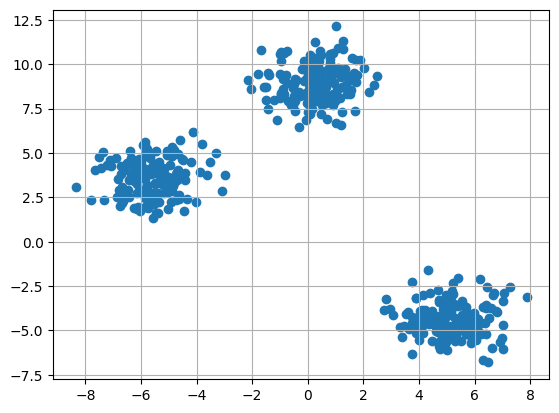

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

grfk = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
k = 3

clusters = {}
np.random.seed(23)
for idx in range(k):
  # Scaling the values by 2 and subtracting 1,
  # which maps the random values to a range between -1 and 1.
  merkez = 2*(2*np.random.random((X.shape[1],))-1)
  noktalar = []
  cluster = {
      'merkezler': merkez,
      'noktalar': []
  }
  clusters[idx] = cluster
clusters

{0: {'merkezler': array([0.06919154, 1.78785042]), 'noktalar': []},
 1: {'merkezler': array([ 1.06183904, -0.87041662]), 'noktalar': []},
 2: {'merkezler': array([-1.11581855,  0.74488834]), 'noktalar': []}}

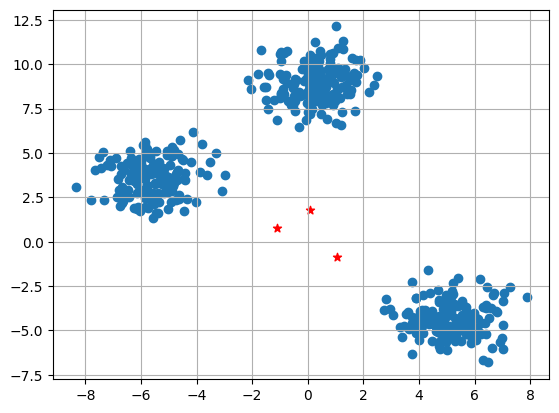

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
  merkez = clusters[i]['merkezler']
  plt.scatter(merkez[0],merkez[1],marker='*',c='red')
plt.show()

In [6]:
def mesafe(p1, p2):
  return np.sqrt(np.sum((p1-p2)**2))

# *Küme Merkezlerini Atama ve Güncelleme*

In [7]:
# Veri merkezlerine küme noktalarını atama
def merkez_atama(X, clusters):
  for idx in range(X.shape[0]):
    msf = [] # kümelere olan minimum mesafenin karesi
    curr_x = X[idx]

    for i in range(k): # k tane toplam küme sayısı
      ms = mesafe(curr_x, clusters[i]['merkezler']) # veriler ile küme merkezleri arasındaki mesafe hesaplama
      msf.append(ms) # mesafeyi msf listesine ekle
    ykn_mesafe = np.argmin(msf)
    clusters[ykn_mesafe]['noktalar'].append(curr_x) # küme merkezlerini en yakın kümeye atama

  return clusters

# Veri noktalarına göre merkez güncelleme
def guncelleme_merkez(X, clusters):
  for i in range(k):
    noktalar = np.array(clusters[i]['noktalar']) # koordinatların bulunduğu sözlüğü listeye çevirme
    if noktalar.shape[0] > 0:
      yeni_merkez = noktalar.mean(axis=0) # veri noktalarındaki her bir sütunun ort alma
      clusters[i]['merkezler']=yeni_merkez
      clusters[i]['noktalar']=[]

  return clusters

# *Küme Tahmin Etme*

In [ ]:
def tahmin_kumeleme(X, cluster):
  tahmin=[]
  for i in range(X.shape[0]):
    msf=[]
    for j in range(k):
      msf.append(mesafe(X[i],clusters[j]['merkezler']))
    tahmin.append(np.argmin(msf))

  return tahmin

# *Küme merkezlerini atama, güncelleme ve tahmin etme*

In [ ]:
clusters = merkez_atama(X,clusters)
clusters = guncelleme_merkez(X,clusters)
tahmin = tahmin_kumeleme(X,clusters)

# *Merkezleri Çizdirme*

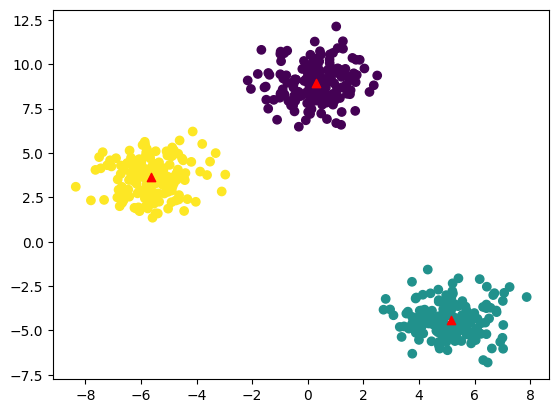

In [ ]:
plt.scatter(X[:,0],X[:,1],c=tahmin)
for i in clusters:
  merkez = clusters[i]['merkezler']
  plt.scatter(merkez[0],merkez[1],marker='^',c='red')
plt.show()